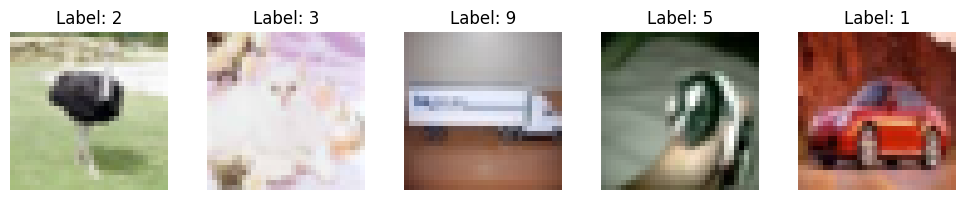

Epoch: 1/20, loss: 2.13367
Epoch: 2/20, loss: 1.76579
Epoch: 3/20, loss: 1.53885
Epoch: 4/20, loss: 1.40448
Epoch: 5/20, loss: 1.32511
Epoch: 6/20, loss: 1.26481
Epoch: 7/20, loss: 1.20964
Epoch: 8/20, loss: 1.16372
Epoch: 9/20, loss: 1.12098
Epoch: 10/20, loss: 1.07959
Epoch: 11/20, loss: 1.04373
Epoch: 12/20, loss: 1.00602
Epoch: 13/20, loss: 0.97221
Epoch: 14/20, loss: 0.94005
Epoch: 15/20, loss: 0.91052
Epoch: 16/20, loss: 0.88532
Epoch: 17/20, loss: 0.85920
Epoch: 18/20, loss: 0.83204
Epoch: 19/20, loss: 0.80751
Epoch: 20/20, loss: 0.78439


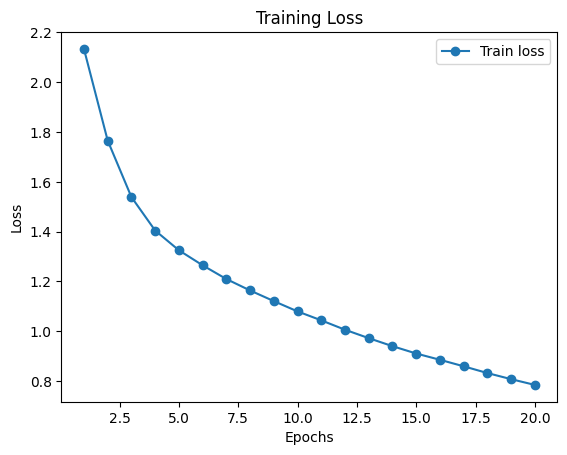

test accuracy: 68.88 %
train accuracy: 76.814 %


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def get_data_loader(batch_size =64):


  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
  ])

  train_set = torchvision.datasets.CIFAR10(root = "./data", train= True, download=True, transform=transform)
  test_set = torchvision.datasets.CIFAR10(root = "./data", train=False, download=True,transform=transform)

  train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,shuffle=False)

  return train_loader, test_loader


def imshow(img):
  img = img / 2 + 0.5
  np_img = img.numpy()
  plt.imshow(np.transpose(np_img, (1,2,0)))
  plt.show()



def get_sample_images(train_loader):
  data_iter = iter(train_loader)
  images, labels = next(data_iter)
  return images, labels


def visualize(n):
  train_loader, _ = get_data_loader()
  images, labels = get_sample_images(train_loader)

  plt.figure(figsize=(n * 2, 2))
  for i in range(n):
    plt.subplot(1, n, i + 1)
    img = images[i]
    img = img / 2 + 0.5  # unnormalize
    np_img = img.cpu().numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.title(f"Label: {labels[i].item()}")
    plt.axis("off")
  plt.tight_layout()
  plt.show()




class CNN(nn.Module):

  def __init__(self):

    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)

    self.relu = nn.ReLU()

    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

    self.dropout= nn.Dropout(0.2)

    self.fc1 = nn.Linear(64*8*8, 128)

    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):

    x = self.pool(self.relu(self.conv1(x)))
    x = self.pool(self.relu(self.conv2(x)))
    x = x.view(-1, 64*8*8)
    x = self.dropout(self.relu(self.fc1(x)))
    x = self.fc2(x)
    return x

define_loss_and_optimizer = lambda model: (
    nn.CrossEntropyLoss(),
    optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)
)




def train_model(model, train_loader, criterion, optimizer, epochs = 20):

  model.train()
  train_losses = []

  for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch: {epoch +1}/{epochs}, loss: {avg_loss:.5f}")

  plt.plot(range(1, epochs +1), train_losses, marker = "o", linestyle= "-", label = "Train loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Training Loss")
  plt.legend()
  plt.show()


def test_model(model, test_loader, dataset_type):
  model.eval()

  correct = 0
  total = 0

  with torch.no_grad():
    for images, labels in test_loader:
      images,labels = images.to(device), labels.to(device)

      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  print(f"{dataset_type} accuracy: {100 * correct/total} %")

if __name__ == "__main__":

  train_loader, test_loader = get_data_loader()

  visualize(5)

  model = CNN().to(device)
  criterion, optimizer = define_loss_and_optimizer(model)
  train_model(model, train_loader,criterion, optimizer)

  test_model(model, test_loader, dataset_type= "test")
  test_model(model, train_loader, dataset_type="train")